# <font color='#31394d'>k-Means Clustering Practice Exercise</font>

In this notebook, we are going to apply clustering algorithm to identify homogenous groups of customers from the `mall_customer.csv` dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <font color='#31394d'>Import and Explore the Data</font>

In [ ]:
df = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\Kamilimu DS\intro-to-ml-2\homework\data\mall_customers.csv')


🚀 <font color='#D9C4B1'>Exercise: </font> Explore your data. How large is it? Are there any missing values? What are the data types?

In [ ]:
df.shape

(200, 5)

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### There are 5 columns
- CustomerID -  numerical
- Gender - female or male; categorical
- Age - numerical
- Annual Income (k$) -numerical
- Spending Score - numerical

#### Gender is categorical but wont be transformed to numerical. This is because the converted values wont represent the actual differences between 0 and 1's. Hence the'll be innacuracy in the model.

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 1.Visualization

<AxesSubplot:>

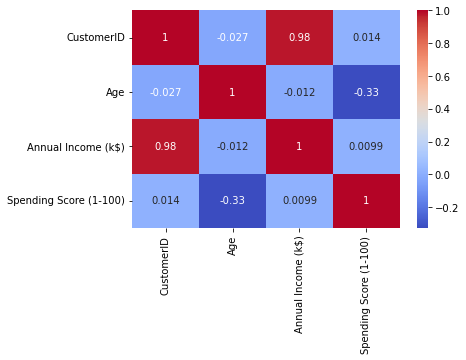

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

### Strong Relations:
- CustomerID and Annual Income
- SpendingScore and Age

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### Gender Analysis

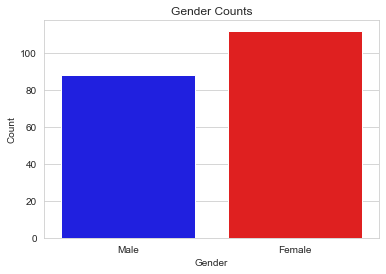

Men Count:88, 44.0%
Female Count:112, 56.0%


In [ ]:
total_female = df[df['Gender']=='Female']['Age'].count()
total_male = df[df['Gender']=='Male']['Age'].count()
total_people = total_male + total_female

sns.countplot(data=df,x='Gender',palette=['blue','red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Counts')
plt.show()


print("Men Count:{}, {}%".format(total_male, np.round((total_male / total_people )*100),2))
print("Female Count:{}, {}%".format(total_female,np.round((total_female / total_people)*100),2))

#### Females are 56% of the customers. Hence, females visit the mall more than males.

#### Age Analysis

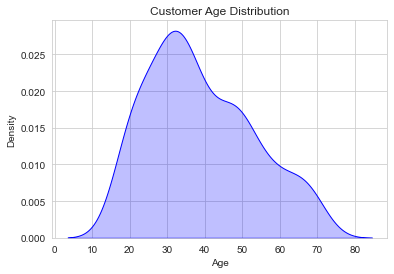

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(df['Age'], fill = True,color='blue')
plt.xlabel('Age')
plt.title('Customer Age Distribution')
plt.show()

In [ ]:
def draw_hist(feature:str, bins_range:range,yticks:range, ylim:any, x_cord:int,y_cord:int):
    males = df[df['Gender']=='Male'][feature]
    females = df[df['Gender']=='Female'][feature]

    # create a range from min to max feature count e.g age count and increment by the last param. 
    # each bin in the hist will represent the ranges e.g 15-20 
    bins = bins_range
    # Create a figure with two subplots side by side
    # y-axis is same for both subplots
    fig,(AX1,AX2) = plt.subplots(1,2, figsize=(15,5), sharey=True)

    #Male hostogram /left subplot ax1
    sns.histplot(males,bins=bins, kde=True,color='blue', ax=AX1,edgecolor='black',linewidth=2)
    AX1.set_xticks(bins)
    AX1.set_yticks(yticks)
    AX1.set_ylim(ylim)
    AX1.set_title('Males')
    AX1.set_ylabel('Count')
    AX1.text(x_cord,y_cord, "Mean {}: {:.1f}k$".format(feature,males.mean()))
    AX1.text(x_cord,y_cord-1, "Median {}: {:.1f}k$".format(feature,males.median()))
    AX1.text(x_cord,y_cord-2, "Std Deviation: {:.1f}k$". format(males.std()))

    #Females Hist
    sns.histplot(females, bins=bins, kde=True,color='red',ax=AX2, edgecolor = 'black',linewidth=2)
    AX2.set_xticks(bins)
    AX2.set_title('Female')
    AX2.text(x_cord,y_cord, "Mean {}: {:.1f}k$".format(feature,females.mean()))
    AX2.text(x_cord,y_cord-1, "Median {}: {:.1f}k$".format(feature,females.median()))
    AX2.text(x_cord,y_cord-2, "Std Deviation: {:.1f}k$".format(females.std()))

    # Add a main title to the figure
    plt.suptitle('Distribution of Customer {} by Gender'.format(feature), fontsize=16)

    plt.show()

In [ ]:
#Boxplot
def draw_box(feature:str):
    sns.boxplot(df,x='Gender',y=feature)
    plt.title('BoxPlot of {}'.format(feature))
    plt.show()

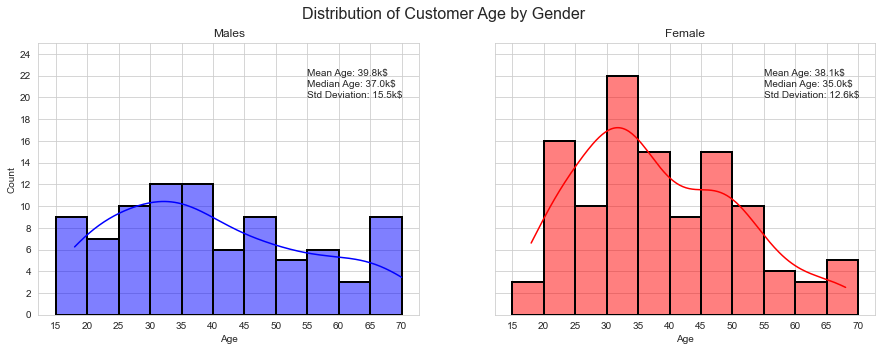

In [ ]:

draw_hist(feature='Age', bins_range=range(15,75,5),yticks=range(0,25,2),ylim=(0,25),x_cord=55,y_cord=22)

### Notes
- The mean age of men shoppers,39 is slightly older than for women,38.
- Distribution for male ages is more uniform than female.
- The biggest male age group is 30-40 yrs while for women it's 30-35 yrs.

In [ ]:
import plotly.graph_objs as go

male_data = df[df['Gender']=='Male']
female_data = df[df['Gender']=='Female']

# Calculate value counts and percentages for each gender
male_counts = male_data['Age'].value_counts().sort_index()
male_percents = male_counts * 100 / male_counts.sum()
female_counts = female_data['Age'].value_counts().sort_index()
female_percents = female_counts * 100 / female_counts.sum()

# Create traces for each gender
trace1 = go.Scatter(x=male_counts.index, y=male_counts, name="Male", marker=dict(color="blue"))
trace2 = go.Scatter(x=female_counts.index, y=female_counts, name="Female", marker=dict(color='red'))

# Combine traces and create layout
data = [trace1, trace2]
layout = {'title':"Age count: Male vs Female",'xaxis':{'title':"Age"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()

#### Notes
- Females from ages 21-51 mall frequently but after that the male start going to the mall more.

### Annual Income Analysis

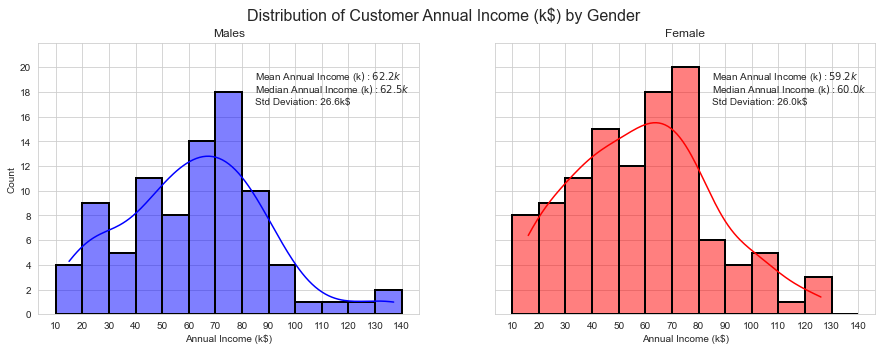

In [ ]:
draw_hist(feature='Annual Income (k$)', bins_range=range(10,150,10),yticks=range(0,22,2),ylim=(0,22),x_cord=85,y_cord=19)

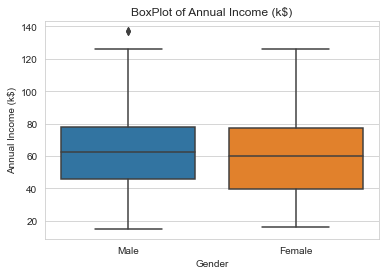

In [ ]:
#Boxplot
draw_box('Annual Income (k$)')

### Notes
- Mean Annual Income for males is higher than of females
- Median Annual Income for males is higher than of females
- Standard dev. is same for both genders.
- There's an outlier in the male group of about 140k$ Annual Income

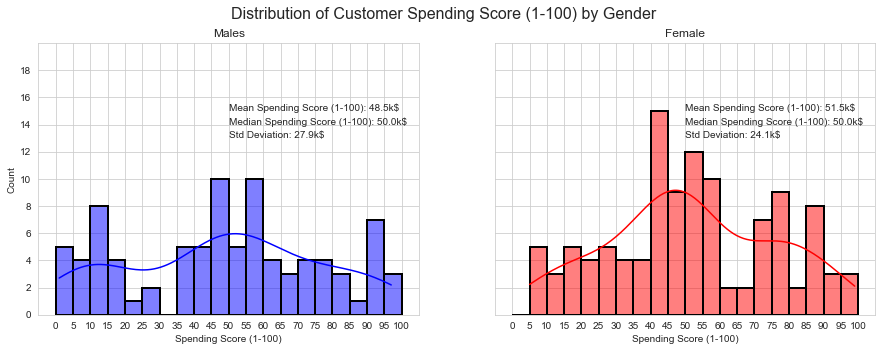

In [ ]:
draw_hist(feature='Spending Score (1-100)', bins_range= range(0,105,5),yticks=range(0,20,2),ylim=(0,20),x_cord=50,y_cord=15)

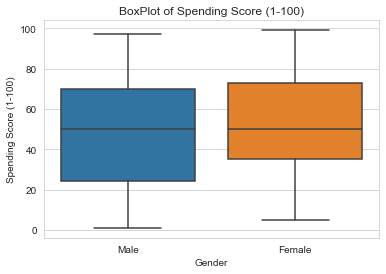

In [ ]:
draw_box('Spending Score (1-100)')

### Notes
- Females have a higher mean spending score than males.
- Most Females are above the median scoring score.
- Most Males are below the median scoring score.
- Females, despite of having a lesser annual income than males, spend more than males. Maybe, it's coz they go to the mall often.

🚀 <font color='#D9C4B1'>Exercise: </font> The income and spending score columns have pretty awkward names. Rename them as "AnnualIncome" and "SpendingScore", respectively.

In [ ]:
# your code goes here

🚀 <font color='#D9C4B1'>Exercise: </font> Visualize the `Age` and `SpendingScore` distinguished by `Gender`.

In [ ]:
# your code goes here

### <font color='#31394d'> Apply k-Means Clustering </font>

Let's attempt to identify clusters based on Age and SpendingScore. Using two variables will allow us to visualize the results, but feel free to re-run this with all the continuous variables. K-means clustering is not suitable for categorical variables.

In [ ]:
from sklearn.cluster import KMeans

🚀 <font color='#D9C4B1'>Exercise: </font> Have a look at the help for `KMeans`. What do the "init" and "n_init" arguments do?

In [ ]:
# your code goes here

Let's perform k-Means clustering with k=4 (no particular reason, just as an example!)...

In [ ]:
km = KMeans(n_clusters=4) # K = 4 
km.fit(df[['Age','SpendingScore']])

🚀 <font color='#D9C4B1'>Exercise: </font> What attributes does the `km` object have?

In [ ]:
# your code goes here

Let's have a look at cluster centroids:

In [ ]:
pd.DataFrame(km.cluster_centers_, columns=['Age','SpendingScore'], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])

Let's add a column with the predicted cluster label:

In [ ]:
df['Cluster'] = km.labels_ + 1
df.head()

Let's visualize our clusters. Note that we can only do this because this is a toy example with two features (so we can plot them in a 2D space). If we had more than three features, we would not be able to visualize the clusters, but we could still examine the cluster centroids to determine what the clusters represent.

In [ ]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

### <font color='#31394d'> Finding the Best k</font>

The `sklearn` `KMeans` method calls the total within-cluster variation "inertia". This is stored as the `inertia_` attribute of the fitted object. Next, we will loop over different values of k, store the inertia and choose the best value of k using the "elbow" method. 

In [ ]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df[['Age','SpendingScore']])
    inertia.append(estimator.inertia_)

In [ ]:
inertia

In [ ]:
sns.pointplot(x=np.arange(1,21), y=inertia)

🚀 <font color='#D9C4B1'>Exercise: </font> How many clusters would you select? (There is no single "right" answer.)